## Importing Packages

In [806]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.nn import sigmoid

#### Helper Functions

In [679]:
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = (data[column] < lower_limit) | (data[column] > upper_limit)
    return outliers

## -------------------------------------------------------------------------------------------------------

## Reading the CSV File

In [680]:
data = pd.read_csv("../data/first inten project.csv")
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [681]:
len(data)

36285

## -------------------------------------------------------------------------------------------------------

### Checking "number of adults" Feature

In [682]:
column = "number of adults"

In [683]:
data[column].describe()

count    36285.000000
mean         1.844839
std          0.518813
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: number of adults, dtype: float64

In [684]:
data[column].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [685]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of adults'>

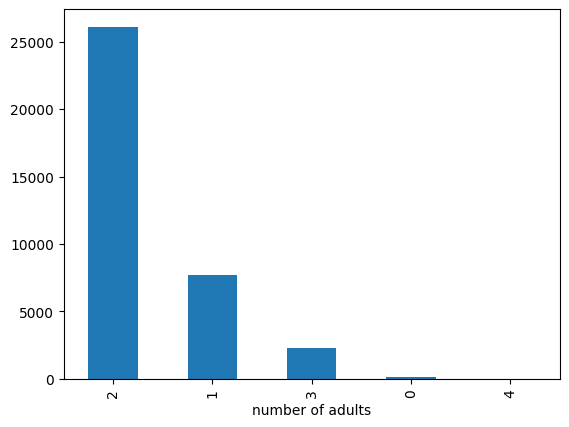

In [686]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of children" Feature

In [687]:
column = "number of children"

In [688]:
data[column].describe()

count    36285.000000
mean         0.105360
std          0.402704
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: number of children, dtype: float64

In [689]:
data[column].value_counts()

number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [690]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of children'>

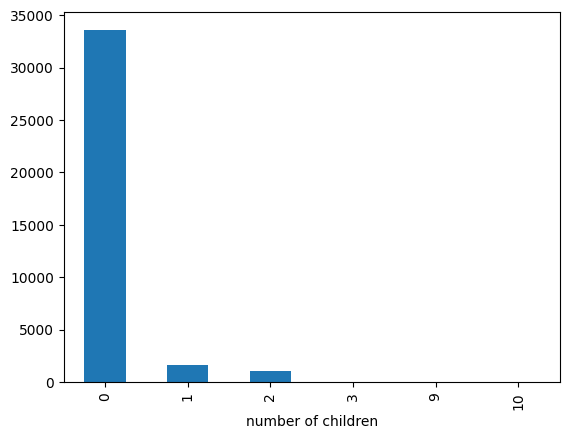

In [691]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of weekend nights" Feature

In [692]:
column = "number of weekend nights"

In [693]:
data[column].describe()

count    36285.000000
mean         0.810693
std          0.870590
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: number of weekend nights, dtype: float64

In [694]:
data[column].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [695]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of weekend nights'>

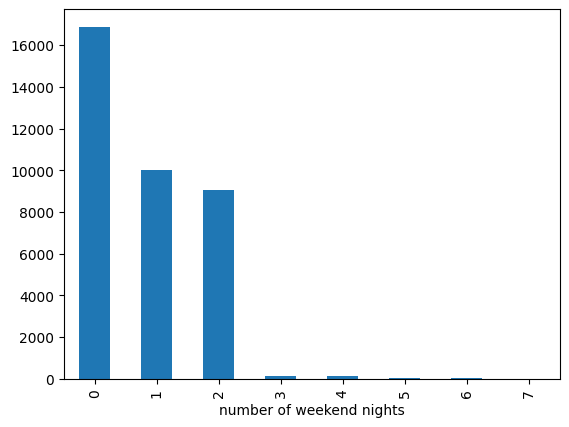

In [696]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of week nights" Feature

In [697]:
column = "number of week nights"

In [698]:
data[column].describe()

count    36285.000000
mean         2.204602
std          1.410946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: number of week nights, dtype: float64

In [699]:
data[column].value_counts()

number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [700]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of week nights'>

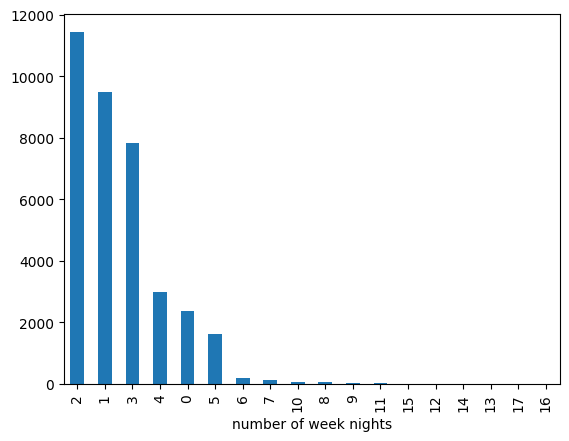

In [701]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "type of meal" Feature

In [702]:
column = "type of meal"

In [703]:
data[column].describe()

count           36285
unique              4
top       Meal Plan 1
freq            27842
Name: type of meal, dtype: object

In [704]:
data[column].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [705]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='type of meal'>

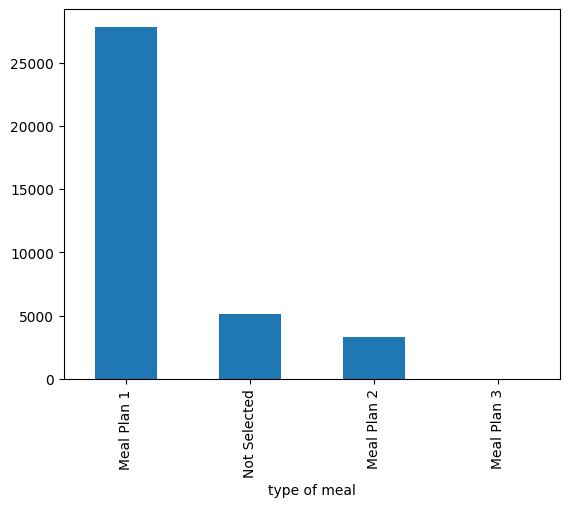

In [706]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [707]:
# Not Selected ...> 0
# Meal Plan 1  ...> 1
# Meal Plan 2  ...> 2
# Meal Plan 3  ...> 3

In [708]:
data[column] = data[column].replace("Not Selected", 0)
data[column] = data[column].replace("Meal Plan 1", 1)
data[column] = data[column].replace("Meal Plan 2", 2)
data[column] = data[column].replace("Meal Plan 3", 3)

/tmp/ipykernel_34441/1547429505.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Meal Plan 3", 3)


In [709]:
data[column].value_counts()

type of meal
1    27842
0     5132
2     3306
3        5
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "car parking space" Feature

In [710]:
column = "car parking space"

In [711]:
data[column].describe()

count    36285.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: car parking space, dtype: float64

In [712]:
data[column].value_counts()

car parking space
0    35161
1     1124
Name: count, dtype: int64

In [713]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='car parking space'>

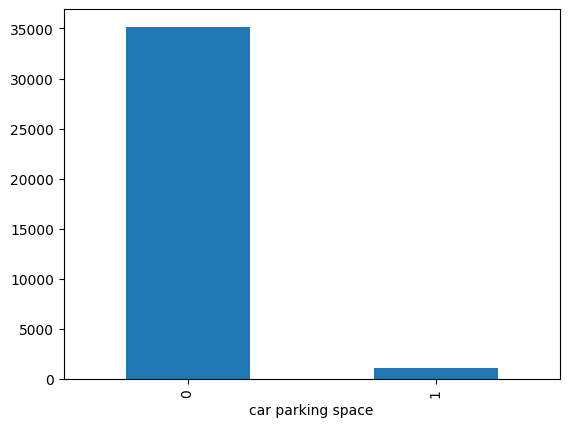

In [714]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "room type" Feature

In [715]:
column = "room type"

In [716]:
data[column].describe()

count           36285
unique              7
top       Room_Type 1
freq            28138
Name: room type, dtype: object

In [717]:
data[column].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [718]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='room type'>

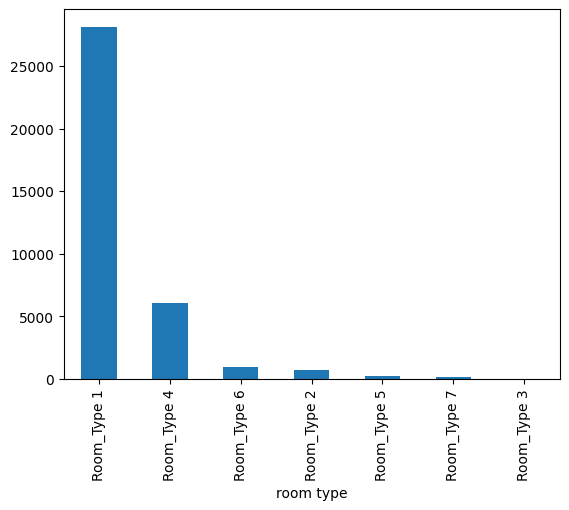

In [719]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [720]:
# Room_Type 1  ...> 0
# Room_Type 2  ...> 1
# Room_Type 3  ...> 2
# Room_Type 4  ...> 3
# Room_Type 5  ...> 4
# Room_Type 6  ...> 5
# Room_Type 7  ...> 6

In [721]:
data[column] = data[column].replace("Room_Type 1", 0)
data[column] = data[column].replace("Room_Type 2", 1)
data[column] = data[column].replace("Room_Type 3", 2)
data[column] = data[column].replace("Room_Type 4", 3)
data[column] = data[column].replace("Room_Type 5", 4)
data[column] = data[column].replace("Room_Type 6", 5)
data[column] = data[column].replace("Room_Type 7", 6)

/tmp/ipykernel_34441/4244024858.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Room_Type 7", 6)


In [722]:
data[column].value_counts()

room type
0    28138
3     6059
5      966
1      692
4      265
6      158
2        7
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "lead time" Feature

In [723]:
column = "lead time"

In [724]:
data[column].describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead time, dtype: float64

In [725]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='lead time', ylabel='Count'>

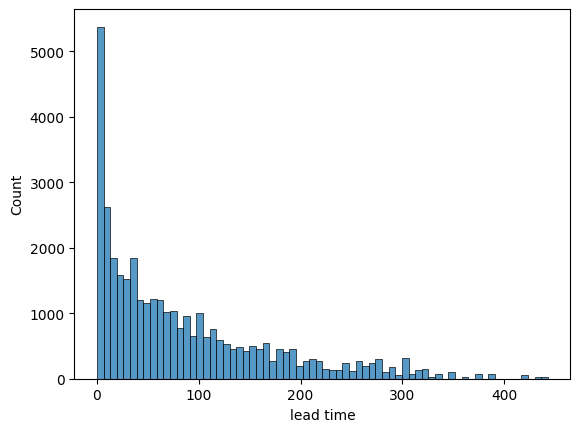

In [726]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='lead time'>

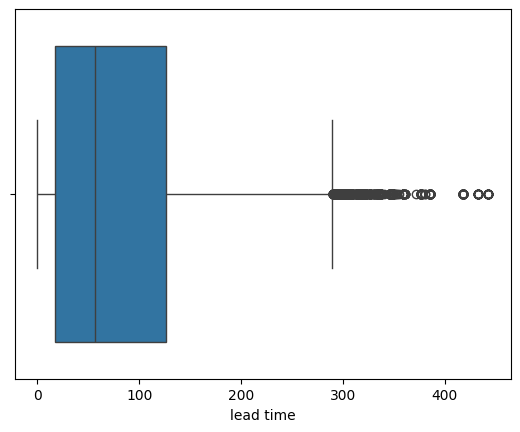

In [727]:
sns.boxplot(data[column], orient="h")

In [728]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1332


- I will not remove/replace the outliers because higher values for lead time may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "market segment type" Feature

In [729]:
column = "market segment type"

In [730]:
data[column].describe()

count      36285
unique         5
top       Online
freq       23221
Name: market segment type, dtype: object

In [731]:
data[column].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [732]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='market segment type'>

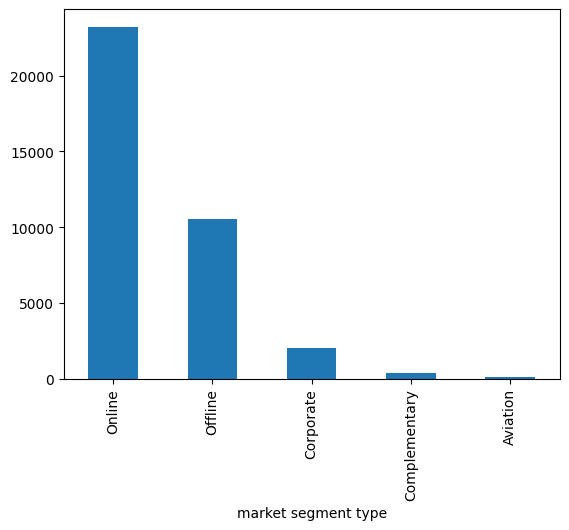

In [733]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [734]:
# Online         ...> 0
# Offline        ...> 1
# Corporate      ...> 2
# Complementary  ...> 3
# Aviation       ...> 4

In [735]:
data[column] = data[column].replace("Online", 0)
data[column] = data[column].replace("Offline", 1)
data[column] = data[column].replace("Corporate", 2)
data[column] = data[column].replace("Complementary", 3)
data[column] = data[column].replace("Aviation", 4)

/tmp/ipykernel_34441/1028570482.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Aviation", 4)


In [736]:
data[column].value_counts()

market segment type
0    23221
1    10531
2     2017
3      391
4      125
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "repeated" Feature

In [737]:
column = "repeated"

In [738]:
data[column].describe()

count    36285.000000
mean         0.025630
std          0.158032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated, dtype: float64

In [739]:
data[column].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

In [740]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='repeated'>

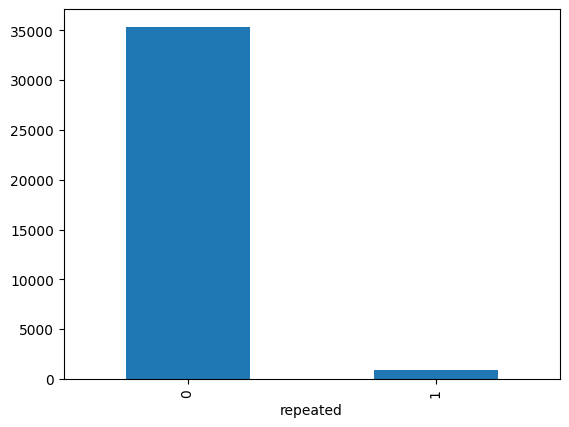

In [741]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-C" Feature

In [742]:
column = "P-C"

In [743]:
data[column].describe()

count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: P-C, dtype: float64

In [744]:
data[column].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [745]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='P-C'>

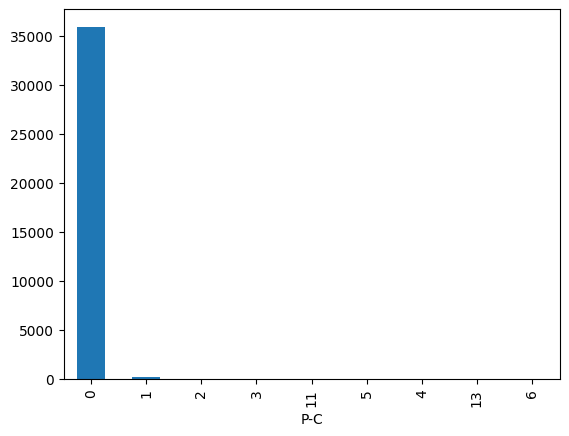

In [746]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-not-C" Feature

In [747]:
column = "P-not-C"

In [748]:
data[column].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: P-not-C, dtype: float64

In [749]:
data[column].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [750]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


In [751]:
#data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "average price" Feature

In [752]:
column = "average price "

In [753]:
data[column].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price , dtype: float64

In [754]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='average price ', ylabel='Count'>

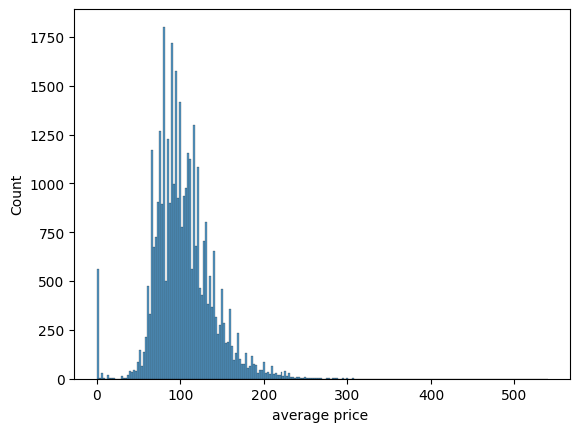

In [755]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='average price '>

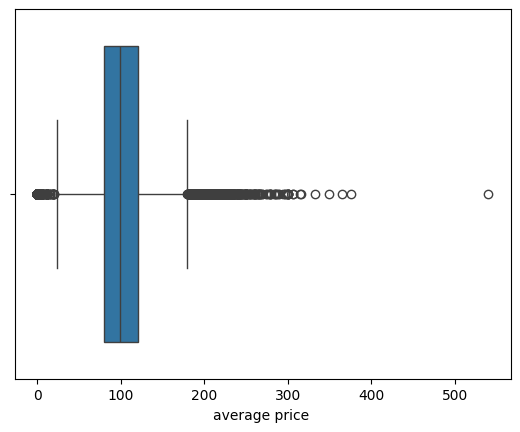

In [756]:
sns.boxplot(data[column], orient="h")

In [757]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1696


- I will not remove/replace the outliers because higher values for the average price may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "special requests" Feature

In [758]:
column = "special requests"

In [759]:
data[column].describe()

count    36285.000000
mean         0.619733
std          0.786262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: special requests, dtype: float64

In [760]:
data[column].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

In [761]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='special requests'>

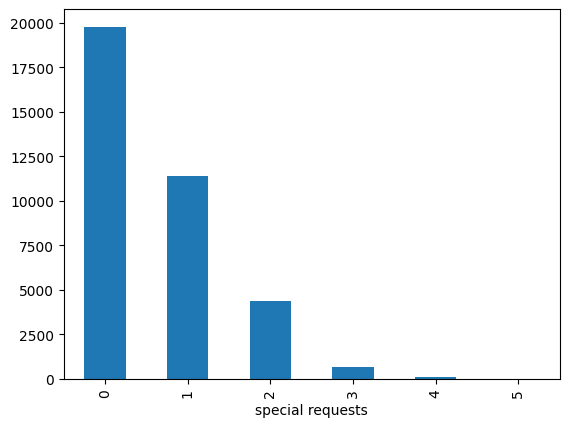

In [762]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "booking status" 

In [763]:
column = "booking status"

In [764]:
data[column].describe()

count            36285
unique               2
top       Not_Canceled
freq             24396
Name: booking status, dtype: object

In [765]:
data[column].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [766]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='booking status'>

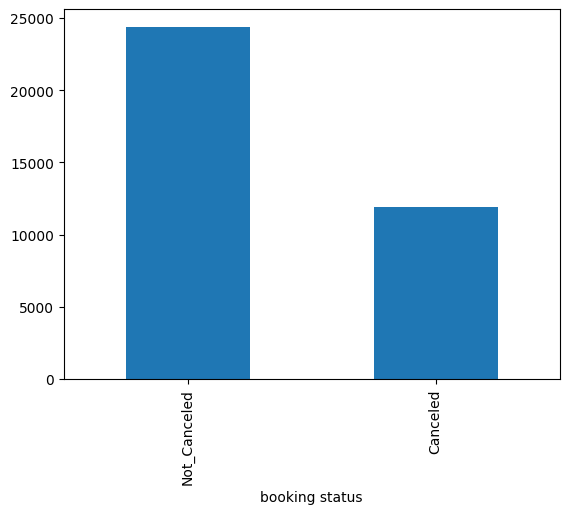

In [767]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [768]:
# Not_Canceled  ...> 0
# Canceled      ...> 1

In [769]:
data[column] = data[column].replace("Not_Canceled", 0)
data[column] = data[column].replace("Canceled", 1)

/tmp/ipykernel_34441/4098707111.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Canceled", 1)


In [770]:
data[column].value_counts()

booking status
0    24396
1    11889
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

## Checking the relationship between Categorical Features and Average Price

- You may ignore this section

In [771]:
def plot(x, y):
    sns.stripplot(x=x, y=y, data=data, jitter=True)
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

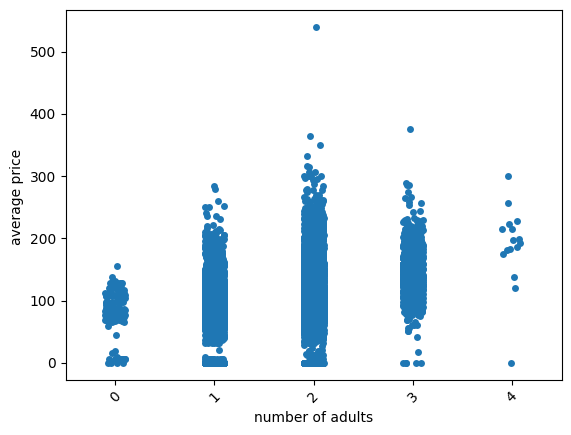

In [772]:
x = "number of adults"
y = "average price "
plot(x, y)

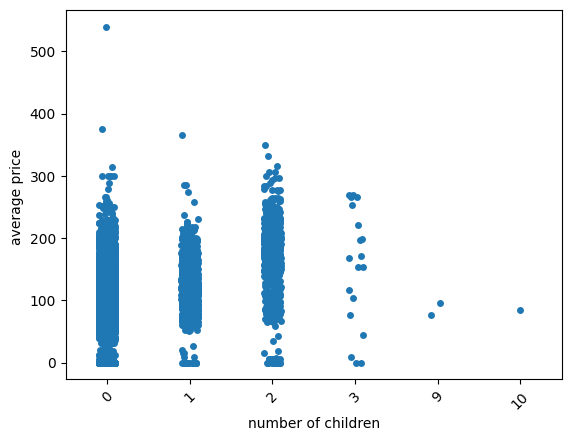

In [773]:
x = "number of children"
y = "average price "
plot(x, y)

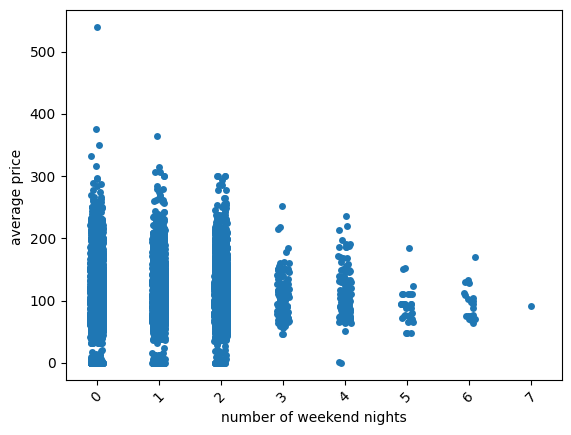

In [774]:
x = "number of weekend nights"
y = "average price "
plot(x, y)

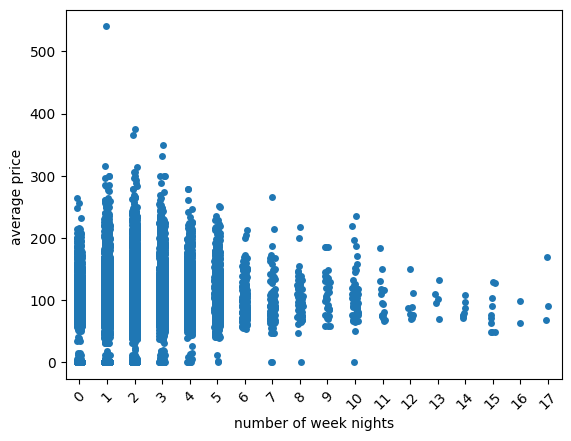

In [775]:
x = "number of week nights"
y = "average price "
plot(x, y)

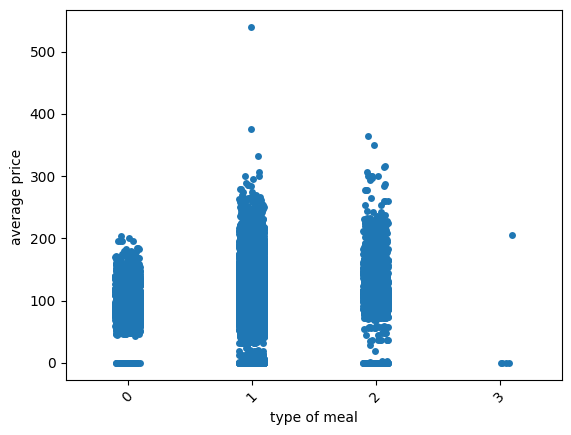

In [776]:
x = "type of meal"
y = "average price "
plot(x, y)

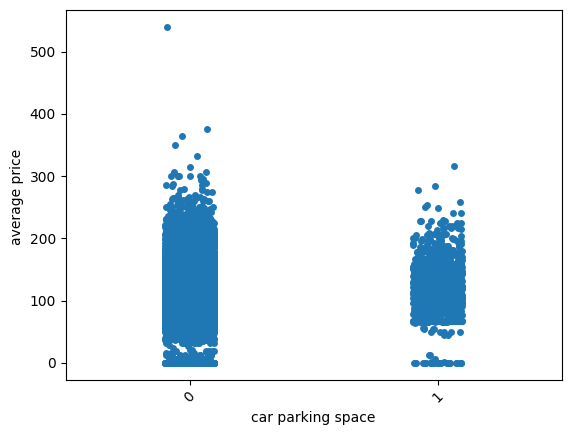

In [777]:
x = "car parking space"
y = "average price "
plot(x, y)

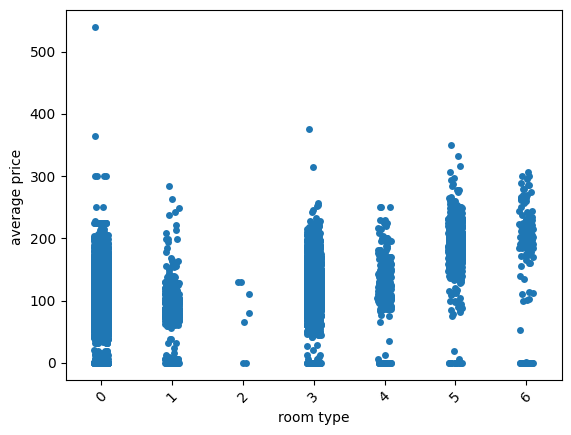

In [778]:
x = "room type"
y = "average price "
plot(x, y)

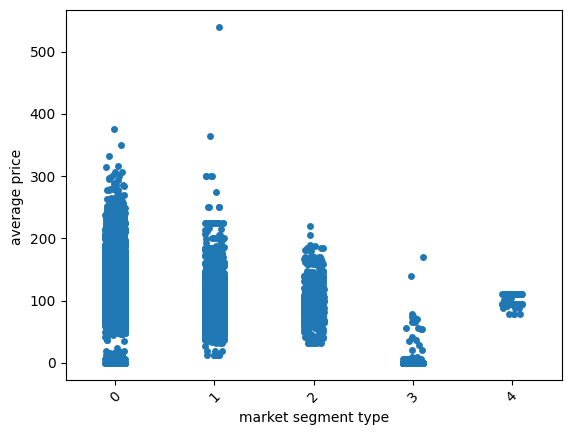

In [779]:
x = "market segment type"
y = "average price "
plot(x, y)

#### Comments
- The analysis suggests that average price does not exhibit a linear relationship with the individual categorical features examined. For instance, changes in the number of nights or the number of children do not appear to significantly affect the average price.
- Specifically, increasing the number of nights booked or the number of children does not show a corresponding change in the average price.
- I believe that average price may be influenced by a combination of features working together rather than any single feature individually. It is likely that the interplay between multiple variables contributes to variations in average price.

## -------------------------------------------------------------------------------------------------------

#### Combining the "number of week nights" and "number of weekend nights" into one Feature

In [780]:
data["total nights"] = data["number of week nights"] + data["number of weekend nights"]

#### Extract the Feature "month" and the Feature "day" from the "date of reservation"

In [781]:
data["date of reservation"] = data["date of reservation"].replace('2018-2-29', '2/28/2018')
data["date of reservation"] = pd.to_datetime(data["date of reservation"], format="%m/%d/%Y", errors="coerce")
data["month"] = data["date of reservation"].dt.month
data["day"] = data["date of reservation"].dt.day

In [782]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights,month,day
0,INN00001,1,1,2,5,1,0,0,224,1,0,0,0,88.00,0,2015-10-02,0,7,10,2
1,INN00002,1,0,1,3,0,0,0,5,0,0,0,0,106.68,1,2018-11-06,0,4,11,6
2,INN00003,2,1,1,3,1,0,0,1,0,0,0,0,50.00,0,2018-02-28,1,4,2,28
3,INN00004,1,0,0,2,1,0,0,211,0,0,0,0,100.00,1,2017-05-20,1,2,5,20
4,INN00005,1,0,1,2,0,0,0,48,0,0,0,0,77.00,0,2018-04-11,1,3,4,11


## -------------------------------------------------------------------------------------------------------

#### Dropping Unnecessary Features

In [783]:
data.drop(columns=["Booking_ID", "date of reservation", "number of weekend nights", "number of week nights"], inplace=True)

In [784]:
data.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day
0,1,1,1,0,0,224,1,0,0,0,88.00,0,0,7,10,2
1,1,0,0,0,0,5,0,0,0,0,106.68,1,0,4,11,6
2,2,1,1,0,0,1,0,0,0,0,50.00,0,1,4,2,28
3,1,0,1,0,0,211,0,0,0,0,100.00,1,1,2,5,20
4,1,0,0,0,0,48,0,0,0,0,77.00,0,1,3,4,11


## -------------------------------------------------------------------------------------------------------

## Feature Scaling 

In [785]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [786]:
features = ["average price ", "lead time", "P-not-C", "total nights"]

In [787]:
for feature in features:
    data[feature] = scaler.fit_transform(data[[feature]])

In [788]:
#data["average price "] = np.log(data["average price "] + 0.001)

In [789]:
#data["lead time"] = np.log(data["lead time"] + 0.001)

In [790]:
data.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day
0,1,1,1,0,0,1.614661,1,0,0,-0.087444,-0.439538,0,0,2.231109,10,2
1,1,0,0,0,0,-0.933699,0,0,0,-0.087444,0.092868,1,0,0.551354,11,6
2,2,1,1,0,0,-0.980244,0,0,0,-0.087444,-1.522592,0,1,0.551354,2,28
3,1,0,1,0,0,1.463389,0,0,0,-0.087444,-0.097521,1,1,-0.568483,5,20
4,1,0,0,0,0,-0.433336,0,0,0,-0.087444,-0.753054,0,1,-0.008564,4,11


In [791]:
data.describe()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,3.628500e+04,36285.000000,36285.000000,36285.000000,3.628500e+04,3.628500e+04,36285.000000,36285.000000,3.628500e+04,36285.000000,36285.000000
mean,1.844839,0.105360,0.949952,0.030977,0.708860,1.684075e-17,0.447513,0.025630,0.023343,2.996088e-17,4.343348e-16,0.619733,0.327656,-8.028731e-17,7.423811,15.595673
std,0.518813,0.402704,0.480209,0.173258,1.399801,1.000014e+00,0.681489,0.158032,0.368281,1.000014e+00,1.000014e+00,0.786262,0.469365,1.000014e+00,3.069935,8.738817
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9.918806e-01,0.000000,0.000000,0.000000,-8.744431e-02,-2.947662e+00,0.000000,0.000000,-1.688319e+00,1.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,-7.940627e-01,0.000000,0.000000,0.000000,-8.744431e-02,-6.589992e-01,0.000000,0.000000,-5.684825e-01,5.000000,8.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,-3.286088e-01,0.000000,0.000000,0.000000,-8.744431e-02,-1.131972e-01,0.000000,0.000000,-8.564272e-03,8.000000,16.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,4.742993e-01,1.000000,0.000000,0.000000,-8.744431e-02,4.725067e-01,1.000000,1.000000,5.513540e-01,10.000000,23.000000
max,4.000000,10.000000,3.000000,1.000000,6.000000,4.163022e+00,4.000000,1.000000,13.000000,3.298159e+01,1.244310e+01,5.000000,1.000000,1.174972e+01,12.000000,31.000000


In [792]:
#data['average price '] = scaler.fit_transform(data[['average price ']])

## -------------------------------------------------------------------------------------------------------

## Split Data into Train and Test Sets

In [793]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=["booking status"])
y = data["booking status"]

# Split the dataset (80% train, 20% test is typical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [794]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (29028, 15)
Shape of y_train (29028,)
Shape of X_test (7257, 15)
Shape of y_test (7257,)


## -------------------------------------------------------------------------------------------------------

## Fit the Data using LR

In [813]:
model = Sequential(
    [
        Dense(1, activation="sigmoid"),
    ]
)

In [822]:
model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=0.0001), metrics=["accuracy"])

In [823]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7910 - loss: 0.4500
Epoch 2/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7876 - loss: 0.4537
Epoch 3/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.7955 - loss: 0.4450
Epoch 4/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7909 - loss: 0.4507
Epoch 5/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.7932 - loss: 0.4483
Epoch 6/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.7892 - loss: 0.4505
Epoch 7/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.7954 - loss: 0.4457
Epoch 8/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.7929 - loss: 0.4505
Epoch 9/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.7871 - loss: 0.4516
Epoch 10/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7926 - loss: 0.4485
Epoch 11/30
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.7896 - loss: 0.4527
Epoch 12/30
908/908 ━━━━━━━━━━

##### Accuracy on Training Data

In [824]:
train_loss, train_acc = model.evaluate(X_train, y_train)

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7923 - loss: 0.4476


##### Accuracy on Test Data

In [825]:
test_loss, test_acc = model.evaluate(X_test, y_test)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8029 - loss: 0.4362
